In [16]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=400, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=200, activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [18]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Epoch 1/50
240/240 - 1s - loss: 0.3409 - accuracy: 0.9061 - val_loss: 0.1546 - val_accuracy: 0.9554
Epoch 2/50
240/240 - 1s - loss: 0.1263 - accuracy: 0.9620 - val_loss: 0.1113 - val_accuracy: 0.9676
Epoch 3/50
240/240 - 1s - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0973 - val_accuracy: 0.9717
Epoch 4/50
240/240 - 1s - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0895 - val_accuracy: 0.9733
Epoch 5/50
240/240 - 1s - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0850 - val_accuracy: 0.9762
Epoch 6/50
240/240 - 1s - loss: 0.0284 - accuracy: 0.9918 - val_loss: 0.0930 - val_accuracy: 0.9745
Epoch 7/50
240/240 - 1s - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0823 - val_accuracy: 0.9770
Epoch 8/50
240/240 - 1s - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0936 - val_accuracy: 0.9762
Epoch 9/50
240/240 - 1s - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0855 - val_accuracy: 0.9790
Epoch 10/50
240/240 - 1s - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0948 - val_accuracy: 0.9782

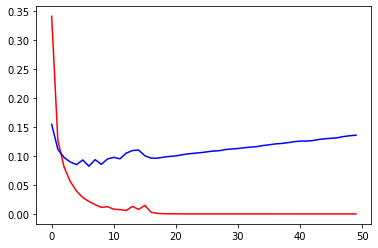

In [19]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

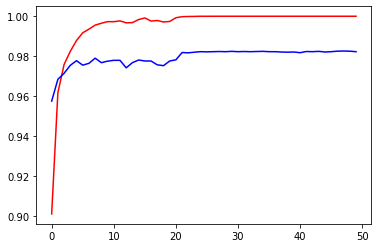

In [5]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [20]:
# 顯示訓練成果(分數) 98.7%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9963

	[Info] Accuracy of training data = 99.6%


In [21]:
x_Test_norm.shape


(10000, 784)

In [22]:
# 顯示訓練成果(分數) 96.2%
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9824

	[Info] Accuracy of testing data = 98.2%


In [33]:
# how to read sample image and detect 
!dir *.jpg

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  DCCA-FFA5

 C:\python\第三階段\day07-20210929-chap04 的目錄

2021/09/29  下午 09:16             1,005 6.jpg
2021/09/29  下午 09:30               969 66.jpg
2021/09/29  上午 05:39            33,760 bear.jpg
2021/09/29  上午 05:40           256,759 bird.jpg
               4 個檔案         292,493 位元組
               0 個目錄  117,112,463,360 位元組可用


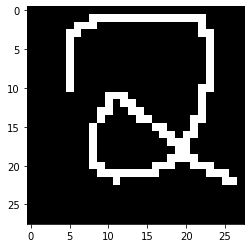

In [42]:
import matplotlib.pyplot as plt
from skimage import color
test = color.rgb2gray(plt.imread('2.jpg')) # 手寫.png 6.jpg
plt.imshow(test, cmap='gray')
plt.show()


In [40]:
test.shape

(28, 28)

In [36]:
# ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

In [43]:
import numpy as np
np.argmax(model.predict(test.reshape(1, 784)), axis=1)

array([6], dtype=int64)